# Data Story
### To analyse if reminders to save increase savings.

\
**Note** - Some columns represent values in 0s and 1s. 0 is equivalent to False whereas 1 is equivalent to True.



In [ ]:
#Importing the important modules

In [1]:
import pandas as pd
import statistics
import plotly.express as px

Now let's visualise the data to see if we can find anything?

In [6]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

#Plotting the graph
df = pd.read_csv("savings_data1.csv")
fig = px.scatter(df, y="quant_saved", color="highschool_completed")
fig.show()

Saving savings_data1.csv to savings_data1 (4).csv


If we look at this data, we can see that the yellow dots are the ones who were given a reminder to save (**Since 1 stands for True**) while the blue dots are the ones who were not given a reminder to save.

\
We can also see that most of the outliers are the Blue dots, who have saved more than others.

\
Let's try to see how many people were given a reminder v/s the people who were not given a reminder.

In [8]:
import csv

with open('savings_data1.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(savings_data)
total_people_given_reminder = 0
for data in savings_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Went to High School", "No High School "], y=[total_people_given_reminder, (total_entries - total_people_given_reminder)]))

fig.show()

In [9]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


Now these are some very interesting results! Can you guess why the mean, median and the mode is not same and worlds apart?

\
If we go back and look at the scatterplot we plotted before, we can see that majority of the savings data lies between 0 to 100.

\
Now, since we have a few outliers, which are the blue dots that are away from the rest of the crowd, our mean has significantly increased from the median, since it is the sum of all values by total entries. Since the outliers lie far away from the crowd, the difference is huge.

\
Similarly, for mode, in our data, there are a lot of people who didn't save at all. Thus, the mode of the data is 0. Mode is the value with maximum occurences.

\
Let's see if we have a similar massive difference between the mean, median and mode of people who got reminded and people who didn't receive reminders.

In [12]:
#Mean, median and mode of savings
reminded_savings = []
not_reminded_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people who did not go to high school")
print(f"Mean of savings - {statistics.mean(reminded_savings)}")
print(f"Median of savings - {statistics.median(reminded_savings)}")
print(f"Mode of savings - {statistics.mode(reminded_savings)}")
#To add new lines
print("\n\n")
print("Results for people who went to high school")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"Median of savings - {statistics.median(not_reminded_savings)}")
print(f"Mode of savings - {statistics.mode(not_reminded_savings)}")

Results for people who did not go to high school
Mean of savings - 78.61157672384391
Median of savings - 39.2724
Mode of savings - 2.284



Results for people who went to high school
Mean of savings - 87.22929365730847
Median of savings - 39.2724
Mode of savings - 0.0


In [13]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who did not go to high school -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who went to high school -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who did not go to high school -> 164.58072141099734
Standard deviation of people who went to high school -> 204.91519933877308


In [16]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[2]) != 0:
    age.append(float(data[3]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between high school completion and their savings is - {correlation[0,1]}")


Correlation between high school completion and their savings is - 0.00864309054909597


In [17]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

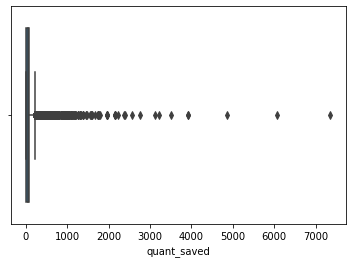

In [18]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [19]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


From here, we can say that anyone who saved roughly more than 213 is an outlier in this data.

\
Now that we've dealt with the outliers, let's see what our mean, median and modes are and also, if we have a normal distribution now. Let's also check the standard deviation now.

In [20]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.20051938981879
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.86687191728863


Here, now our mean is much more closer to the median unlike before, and the mode still remains to be 0 since there are people in our dataset who haven't saved at all!

\
The standard deviation has also significantly reduced from before, but we still do not have a normal distribution curve.

\
To make this a normal distribution curve now, we can simply draw random samples from the population to create a sampling (normal distribution).

In [21]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Here, we have a nice bell curve for normal distribution when doing the sampling. Let's also calculate the standard deviation of this normal sampling distribution

In [22]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.026584055035224


As expected, this comes out to be roughly 1/10th of the standard deviation of the population.

\
Let's also compare the mean of the population and the sampling -

In [23]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.20051938981879
Mean of Sampling Distribution - 46.37905515009035


Awesome, they come out to be exactly the same.

Let's do one final check, by trying to find the correlation between the age and the savings with the new data from which we have removed the outliers!

In [28]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.highschool_completed != 0]

age = temp_df["highschool_completed"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the high school completion and their savings is - {correlation[0,1]}")

Correlation between the high school completion and their savings is - nan


In [30]:
reminded_df = new_df.loc[new_df["highschool_completed"] == 1]
not_reminded_df = new_df.loc[new_df["highschool_completed"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
28    47.178078       0                     0        0
29    98.181000       0                     0        0
38    39.272400       1                     0        0


Now, let's plot the distribution graph for the people who were not reminded to save and see if it follows a normal distribution.

In [31]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (High School Not Completed)"], show_hist=False)
fig.show()

Since this does not follow a normal distribution, we will take the sampling data and plot it. We will use this sampling data in our z-test.

In [32]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (High School Not Completed) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (High School Not Completed) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (High School Not Completed)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (High School Not Completed) -> 45.477719443200996
Standard Deviation of Sampling (High School Not Completed) -> 5.24976741048784


In [33]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 40.227952032713155 and First (end) - 50.72748685368884
Second (start) - 34.978184622225314 and Second (end) - 55.97725426417668
Third (start) - 29.72841721173748 and Third (end) - 61.22702167466451


Now that we have everything we need for our z-test, let's quickly take a sampling distribution of the people who were reminded for saving.

In [35]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Highschool Completed) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Higschool Completed) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Highschool Completed) -> 46.97706132456464
Standard Deviation of Sampling (Higschool Completed) -> 4.875070329760872


In [36]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.2856015827231312
